<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [7]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

Load the csv file and print the first five observations.

In [12]:

# type your code here
df = pd.read_csv("diamond_data.csv")
df.head()
df["color"].unique()

array(['F', 'H', 'J', 'E', 'D', 'G', 'I'], dtype=object)

Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
df["y"].skew()
transformed_width = np.log(df["y"])
transformed_width.skew()

0.15322643692701352

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1548.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        09:38:16   Log-Likelihood:                -13458.
No. Observations:                1547   AIC:                         2.693e+04
Df Residuals:                    1539   BIC:                         2.697e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3518.3031   8776.782     -0.401      0.689   -2.07e+04    1.37e+04
carat       1.242e+04    393.916     31.522      0.000    1.16e+04    1.32e+04
cut           -1.4112     31.963     -0.044      0.965     -64.108      61.285
depth        218.3199    139.614      1.564      0.118     -55.533     492.173
table        -92.3767     19.093     -4.838      0.000    -129.829     -54.925
x          -1281.8518    919.885     -1.393      0.164   -3086.213     522.509
y           3185.6927   1050.236      3.033      0.002    1125.648    5245.737
z          -6072.1073   2295.507     -2.645      0.008   -1.06e+04   -1569.455
==============================================================================
Omnibus:                      532.633   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5231.952
Skew:                           1.317   Prob(JB):                         0.00
Kurtosis:                      11.616   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

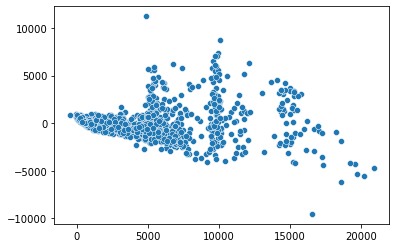

In [22]:
# type your code here
df["cut"] = df["cut"].replace({"Fair":0,"Ideal":1,"Good":2,"Very Good":3,"Premium":4})
pd.get_dummies(df,columns = ["color"],drop_first = True)
x = df.drop(columns = ["price","color"])
y = df["price"]
from statsmodels import api
xc = api.add_constant(x)
ols_model =  api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
y_pred
resid = linear_model.resid
sns.scatterplot(x = y_pred,y = resid)
linear_model.summary()
# lesser than 5 so no autocorrelation


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=100)
lr_forward=sfs(estimator=lr, k_features='best', forward= True)
sfs_forward=lr_forward.fit(x,y)
features_forward=list(sfs_forward.k_feature_names_)

from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
lr = LinearRegression()
lr.fit(xtrain[features_forward],ytrain)
y_pred_train= lr.predict(xtrain[features_forward])
y_pred_test = lr.predict(xtest[features_forward])
train_r2_for= r2_score(ytrain,y_pred_train)
test_r2_for= r2_score(ytest,y_pred_test)
train_r2_for,test_r2_for

# r2 score is 0.88 for the best selected features

(0.8710242185100446, 0.8822697310143878)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
# type your code here
from sklearn.model_selection import KFold
kf = KFold(n_splits = 4)
for d1,d2 in kf.split(x_train):
    print(d1,d2)


[ 271  272  273  274  275  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298
  299  300  301  302  303  304  305  306  307  308  309  310  311  312
  313  314  315  316  317  318  319  320  321  322  323  324  325  326
  327  328  329  330  331  332  333  334  335  336  337  338  339  340
  341  342  343  344  345  346  347  348  349  350  351  352  353  354
  355  356  357  358  359  360  361  362  363  364  365  366  367  368
  369  370  371  372  373  374  375  376  377  378  379  380  381  382
  383  384  385  386  387  388  389  390  391  392  393  394  395  396
  397  398  399  400  401  402  403  404  405  406  407  408  409  410
  411  412  413  414  415  416  417  418  419  420  421  422  423  424
  425  426  427  428  429  430  431  432  433  434  435  436  437  438
  439  440  441  442  443  444  445  446  447  448  449  450  451  452
  453  454  455  456  457  458  459  460  461  462  463  464  465  466
  467 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here
num_df = df.select_dtypes(include = np.number)
x = num_df.drop(columns = "price")
y =  num_df["price"]
from statsmodels import api
xc = api.add_constant(x)
ols_model = api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1548.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        09:49:11   Log-Likelihood:                -13458.
No. Observations:                1547   AIC:                         2.693e+04
Df Residuals:                    1539   BIC:                         2.697e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3518.3031   8776.782     -0.401      0.689   -2.07e+04    1.37e+04
carat       1.242e+04    393.916     31.522      0.000    1.16e+04    1.32e+04
cut           -1.4112     31.963     -0.044      0.965     -64.108      61.285
depth        218.3199    139.614      1.564      0.118     -55.533     492.173
table        -92.3767     19.093     -4.838      0.000    -129.829     -54.925
x          -1281.8518    919.885     -1.393      0.164   -3086.213     522.509
y           3185.6927   1050.236      3.033      0.002    1125.648    5245.737
z          -6072.1073   2295.507     -2.645      0.008   -1.06e+04   -1569.455
==============================================================================
Omnibus:                      532.633   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5231.952
Skew:                           1.317   Prob(JB):                         0.00
Kurtosis:                      11.616   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Table,depth,carat,x,y,c are the most significant variables

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

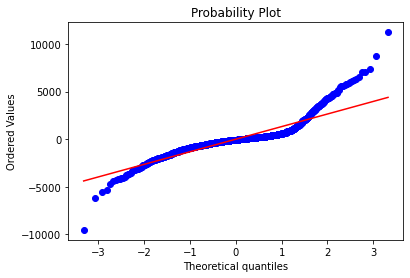

-9522.36747130331

In [39]:
# type your code here
from scipy import stats
stats.probplot(resid,plot = plt)
plt.show()
resid.skew()
# No the errors does not follow a normal distribution
resid.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

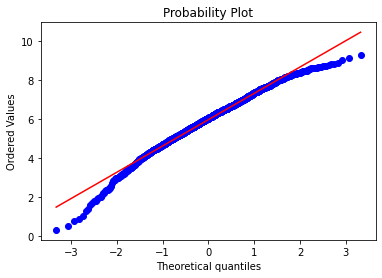

In [49]:
# type your code here
resid_norm = np.square(resid)
resid_norm = np.sqrt(resid_norm)
resid_norm = np.log(resid_norm)
resid_norm.skew()
stats.probplot(resid_norm,plot = plt)
plt.show()
# The errors have become near normal

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
# type your code here
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=100)
lr_forward=sfs(estimator=lr, k_features=7, forward= False)
sfs_forward=lr_forward.fit(x,y)
features_forward=list(sfs_forward.k_feature_names_)

from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
lr = LinearRegression()
lr.fit(xtrain[features_forward],ytrain)
y_pred_train= lr.predict(xtrain[features_forward])
y_pred_test = lr.predict(xtest[features_forward])
train_r2_for= r2_score(ytrain,y_pred_train)
test_r2_for= r2_score(ytest,y_pred_test)
train_r2_for,test_r2_for
features_forward

['carat', 'cut', 'depth', 'table', 'x', 'y', 'z']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
# type your code here
a = pd.get_dummies(df,columns = ["color"],drop_first = True)
a
x = a.drop(columns = "price")
y = a["price"]
from statsmodels import api
xc = api.add_constant(x)
ols_model =  api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
y_pred
resid = linear_model.resid
#sns.scatterplot(x = y_pred,y = resid)
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     957.6
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:50:04   Log-Likelihood:                -13360.
No. Observations:                1547   AIC:                         2.675e+04
Df Residuals:                    1533   BIC:                         2.682e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2134.7188   8265.832     -0.258      0.796   -1.83e+04    1.41e+04
carat       1.318e+04    374.525     35.199      0.000    1.24e+04    1.39e+04
cut           -5.7571     30.088     -0.191      0.848     -64.775      53.261
depth        204.3756    131.472      1.555      0.120     -53.509     462.260
table        -87.1252     17.991     -4.843      0.000    -122.414     -51.836
x          -2010.5553    868.816     -2.314      0.021   -3714.749    -306.362
y           3378.9823    989.570      3.415      0.001    1437.928    5320.037
z          -5534.5621   2162.803     -2.559      0.011   -9776.928   -1292.196
color_E       11.0410    125.733      0.088      0.930    -235.586     257.668
color_F      168.6830    126.360      1.335      0.182     -79.175     416.541
color_G      -21.8326    122.629     -0.178      0.859    -262.370     218.705
color_H     -591.5679    130.422     -4.536      0.000    -847.393    -335.743
color_I     -996.0834    151.403     -6.579      0.000   -1293.063    -699.104
color_J    -1861.8947    181.221    -10.274      0.000   -2217.362   -1506.428
==============================================================================
Omnibus:                      475.204   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6396.838
Skew:                           1.046   Prob(JB):                         0.00
Kurtosis:                      12.740   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# color E color F color G can be removed

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# type your code here



In [63]:
from sklearn.feature_selection import RFE
lr=LinearRegression()
lr_rfe=RFE(estimator=lr,n_features_to_select=5)
rfe_model = lr_rfe.fit(x,y)
rfe_model.ranking_
# RFE selection model
# RFE selection model
rfe_rank=pd.DataFrame()
rfe_rank['Rank']= rfe_model.ranking_
rfe_rank['Feature']= x.columns
features_rfe_rank=rfe_rank[rfe_rank['Rank']==1]['Feature']
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
lr = LinearRegression()
lr.fit(xtrain[features_rfe_rank],ytrain)
y_pred_train= lr.predict(xtrain[features_rfe_rank])
y_pred_test = lr.predict(xtest[features_rfe_rank])
train_r2_rfe= r2_score(ytrain,y_pred_train)
test_r2_rfe= r2_score(ytest,y_pred_test)
train_mse_rfe= mean_squared_error(ytrain,y_pred_train)
test_mse_rfe= mean_squared_error(ytest,y_pred_test)
train_rmse_rfe= np.sqrt(train_r2_rfe)
test_rmse_rfe= np.sqrt(test_r2_rfe)
res_rfe=[train_r2_rfe,test_r2_rfe,train_rmse_rfe,test_rmse_rfe]
res_rfe

[0.8770784774521633,
 0.8879982459913203,
 0.9365246806423007,
 0.9423365884816954]